In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

: 

## Boilerplate needed for notebooks

In [19]:
run_dir = "../results/Debug_09-05-2022_10-27-35/"
current_checkpoint = 100
device_idx = [0]

In [20]:
import sys
import os 
sys.path.append(os.path.dirname(os.getcwd()) + "/src/")

import numpy as np
import torch
import omegaconf

from eval.utils import encode_features
from model.model import Model
from experiment import ExperimentConfig
from dataloader.contrastive_dataloader import get_dataloader
from dataloader.utils import get_unaugmented_dataloader

# Set the default device
default_device = torch.device("cuda:0")
# Load config
cfg = omegaconf.OmegaConf.load(run_dir + ".hydra/config.yaml")
# Load model
model = Model.initialize_model(cfg.model_cfg, device_idx)
state_dict = torch.load(run_dir + f"checkpoints/checkpoint_epoch{current_checkpoint}.pt")
model.load_state_dict(state_dict['model_state'])
# Manually override directory for dataloaders
cfg.train_dataloader_cfg.dataset_cfg.dataset_dir = "../datasets"
cfg.eval_dataloader_cfg.dataset_cfg.dataset_dir = "../datasets"
# Load dataloaders
train_dataset, train_dataloader = get_dataloader(cfg.train_dataloader_cfg)
eval_dataset, eval_dataloader = get_dataloader(cfg.eval_dataloader_cfg)
unaugmented_train_dataloader = get_unaugmented_dataloader(train_dataloader)
# Get encoding of entire dataset
train_eval_input = encode_features(model, unaugmented_train_dataloader, default_device)

Using cache found in /home/kion/.cache/torch/hub/pytorch_vision_v0.10.0
/home/kion/anaconda3/envs/simclr/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/kion/anaconda3/envs/simclr/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Spectra of covariance of 5000 normalized features')

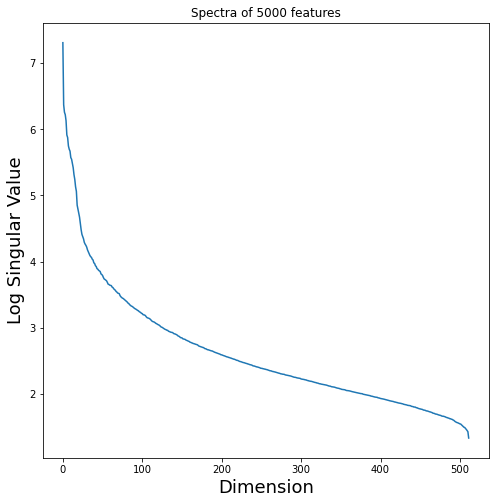

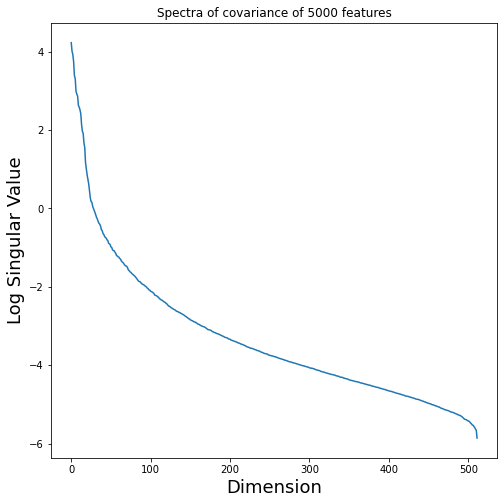

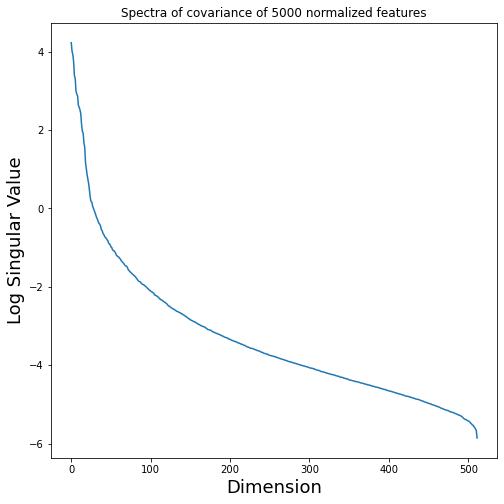

In [21]:
feature_idx = torch.linspace(0, len(train_eval_input.feature_list)-1, 5000, dtype=int)
features = train_eval_input.feature_list[feature_idx]

fig = plt.figure(figsize=(8, 8))
_, s, _ = np.linalg.svd(features.float().numpy())
log_spectra = np.log(s)
plt.plot(log_spectra)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Log Singular Value", fontsize=18)
plt.title("Spectra of 5000 features")

feat_cov = np.cov(features.float().numpy().T)
fig = plt.figure(figsize=(8, 8))
_, s, _ = np.linalg.svd(feat_cov)
log_spectra = np.log(s)
plt.plot(log_spectra)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Log Singular Value", fontsize=18)
plt.title("Spectra of covariance of 5000 features")

feat_norm = torch.nn.functional.normalize(features.float(), dim=1)
feat_cov = np.cov(features.numpy().T)
fig = plt.figure(figsize=(8, 8))
_, s, _ = np.linalg.svd(feat_cov)
log_spectra = np.log(s)
plt.plot(log_spectra)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Log Singular Value", fontsize=18)
plt.title("Spectra of covariance of 5000 normalized features")

Text(0.5, 1.0, 'Spectra of covariance of 5000 normalized features')

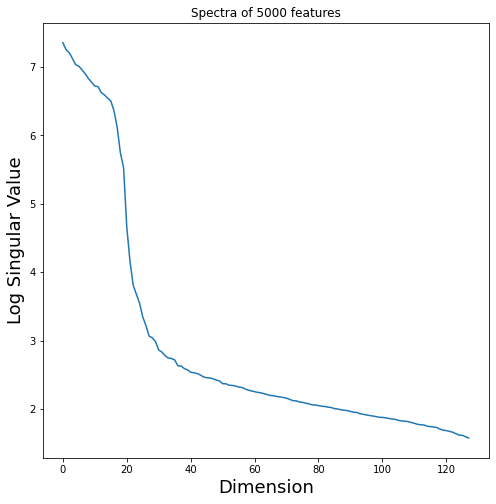

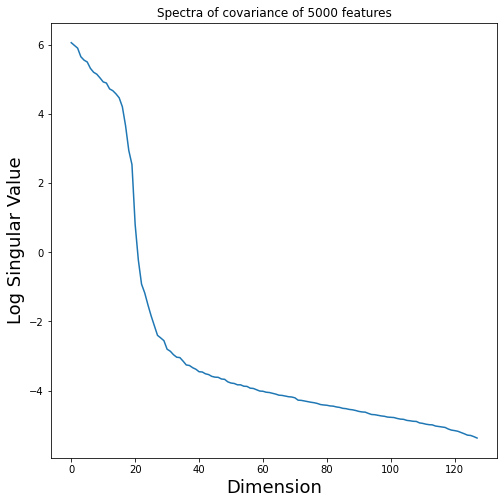

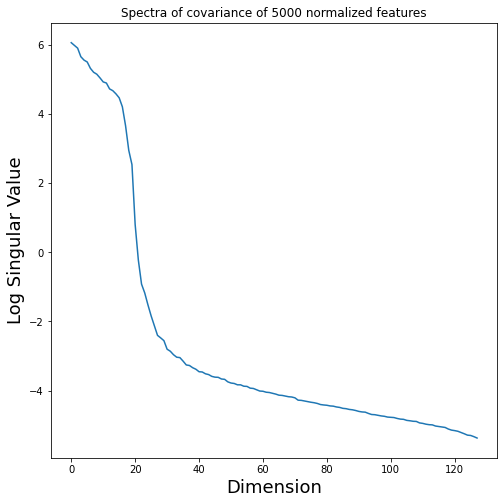

In [22]:
feature_idx = torch.linspace(0, len(train_eval_input.prediction_list)-1, 5000, dtype=int)
features = train_eval_input.prediction_list[feature_idx]

fig = plt.figure(figsize=(8, 8))
_, s, _ = np.linalg.svd(features.float().numpy())
log_spectra = np.log(s)
plt.plot(log_spectra)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Log Singular Value", fontsize=18)
plt.title("Spectra of 5000 features")

feat_cov = np.cov(features.float().numpy().T)
fig = plt.figure(figsize=(8, 8))
_, s, _ = np.linalg.svd(feat_cov)
log_spectra = np.log(s)
plt.plot(log_spectra)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Log Singular Value", fontsize=18)
plt.title("Spectra of covariance of 5000 features")

feat_norm = torch.nn.functional.normalize(features.float(), dim=1)
feat_cov = np.cov(features.numpy().T)
fig = plt.figure(figsize=(8, 8))
_, s, _ = np.linalg.svd(feat_cov)
log_spectra = np.log(s)
plt.plot(log_spectra)
plt.xlabel("Dimension", fontsize=18)
plt.ylabel("Log Singular Value", fontsize=18)
plt.title("Spectra of covariance of 5000 normalized features")